In [1]:
import numpy as np
import astropy
from astropy.io import ascii
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table
from astropy.table import Table, Column
import pylab
from pylab import plot
from astropy.cosmology import WMAP9 as cosmo
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.figure_format='retina'

In [2]:
print("\033[43;30mLendo os catalogos\033[m")
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
k = Table.read('koester2007.vot', format='votable')
print 'Wen:',len(w)
print 'Rykoff:',len(r)
print 'Koester:', len(k) 

Lendo os catalogos


Wen: 132684
Rykoff: 26111
Koester: 13823


In [3]:
print("\033[43;30mValores de Ra, Dec e z de cada catalogo\033[m")
c_w = SkyCoord(ra = w['RAJ2000']*u.degree, dec = w['DEJ2000']*u.deg, distance = cosmo.comoving_distance(w['zph'])) 
c_r = SkyCoord(ra = r['RA']*u.deg, dec = r['DEC']*u.deg, distance = cosmo.comoving_distance(r['Z_LAMBDA']))
c_k = SkyCoord(ra = k['RAJ2000'], dec = k['DEJ2000'], distance = cosmo.comoving_distance(k['zph'])) 

Valores de Ra, Dec e z de cada catalogo


# Match do Wen com o Rykoff

In [4]:
print 'match to catalog 3d'
idwr, d2dw, d3dw = c_w.match_to_catalog_3d(c_r) 
print 'Match Wen em relacao ao Redmapper =',len(idwr)
print idwr, d2dw, d3dw 

print 'match to catalog 3d'
idrw, d2dr, d3dr = c_r.match_to_catalog_3d(c_w) 
print 'Match Wen em relacao ao Redmapper =',len(idrw)
print idrw, d2dr, d3dr

match to catalog 3d
Match Wen em relacao ao Redmapper = 132684
[ 1803  9032 18830 ...,  2468 26004  8176] [u'4d43m43.8962s' u'0d00m00.0182s' u'1d59m21.6947s' ..., u'6d22m59.7905s'
 u'1d16m28.0575s' u'0d20m13.0253s'] [ 45.53540049   6.9589648   71.61914322 ...,  51.57056377  46.46153162
  13.90166084] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 26111
[101460 107605  76974 ...,  65527  48891  38446] [u'1d16m06.0083s' u'0d00m00.0063s' u'0d00m00.0168s' ..., u'0d23m14.6394s'
 u'1d17m58.6335s' u'0d13m31.7554s'] [ 15.65166566  10.31144     13.10023657 ...,  11.55481329  51.6395054
   7.38320118] Mpc


In [5]:
#plt.hist(d2dw, bins=10000)
#plt.xlabel('d2d')
#plt.xlim(0,0.008)
#plt.ylim(0,10)

(0, 10)

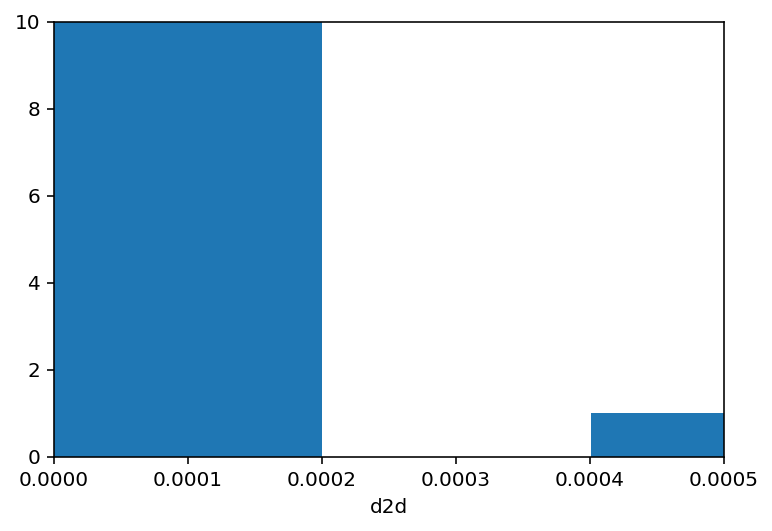

In [6]:
plt.hist(d2dr, bins=30000)
plt.xlabel('d2d')
plt.xlim(0,0.0005)
plt.ylim(0,10)

In [7]:
print len(np.unique(idwr))
print len(np.unique(idrw))
print len(idrw[d2dr<0.0003*u.deg])
print len(idwr[d2dw<0.0003*u.deg])

24430
22256
5276
7812


validation plots

histogram of distances (angular, 3d)

number of matches as a function of distlim: for distlim from 1Mpc to 100Mpc

z vs z

mass proxy vs mass proxy, any outliers?

how to make a match similar to topcat? with a certain 2d+1d separation (1Mpc, dz=0.1)



In [8]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, i*u.kpc)
    lista_i.append(len(idxc_w))
    lista_r.append(i)

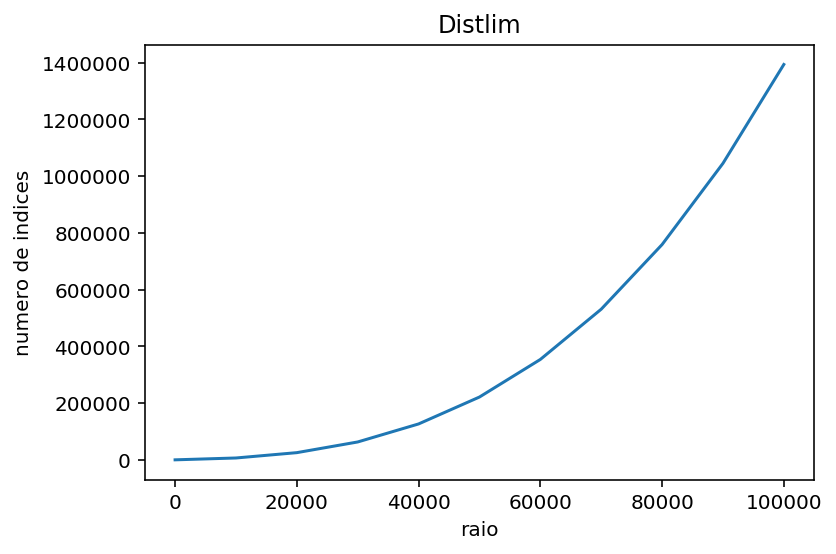

In [9]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.ylabel('numero de indices')
plt.xlabel('raio')
plt.title('Distlim')

In [10]:
print 'Objects around to catalog 3d'
idxc_w, idxc_r, d2d, d3d = c_r.search_around_3d(c_w, 20000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do rykoff =',len(idxc_r)

Objects around to catalog 3d
Números de objetos do wen = 25326
Números de objetos do rykoff = 25326


(array([  1.13110000e+04,   7.56200000e+03,   3.97500000e+03,
          1.43900000e+03,   5.63000000e+02,   2.50000000e+02,
          1.16000000e+02,   7.00000000e+01,   3.50000000e+01,
          5.00000000e+00]),
 array([  1.36877704e-07,   3.06406977e-01,   6.12813818e-01,
          9.19220658e-01,   1.22562750e+00,   1.53203434e+00,
          1.83844118e+00,   2.14484802e+00,   2.45125486e+00,
          2.75766170e+00,   3.06406854e+00]),
 <a list of 10 Patch objects>)

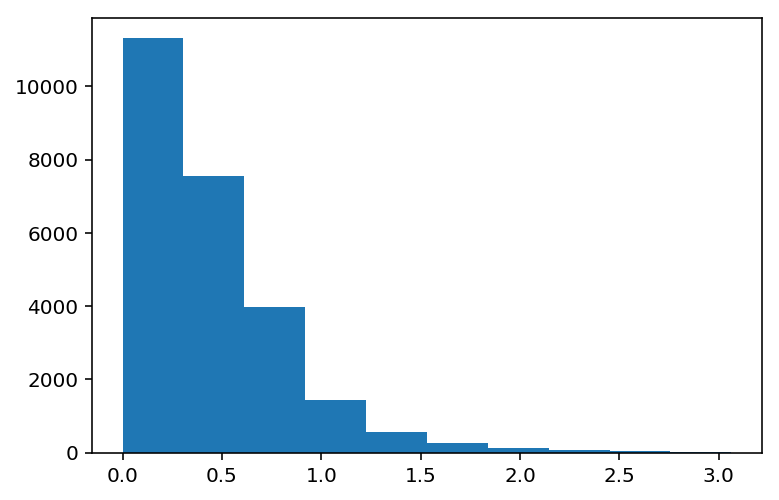

In [11]:
# Histograma de d2d
plt.hist(d2d)

(array([  689.,   947.,  1273.,  1584.,  2036.,  2536.,  3071.,  3738.,
         4416.,  5036.]),
 array([  8.89832252e-03,   2.00799875e+00,   4.00709919e+00,
          6.00619962e+00,   8.00530005e+00,   1.00044005e+01,
          1.20035009e+01,   1.40026013e+01,   1.60017018e+01,
          1.80008022e+01,   1.99999026e+01]),
 <a list of 10 Patch objects>)

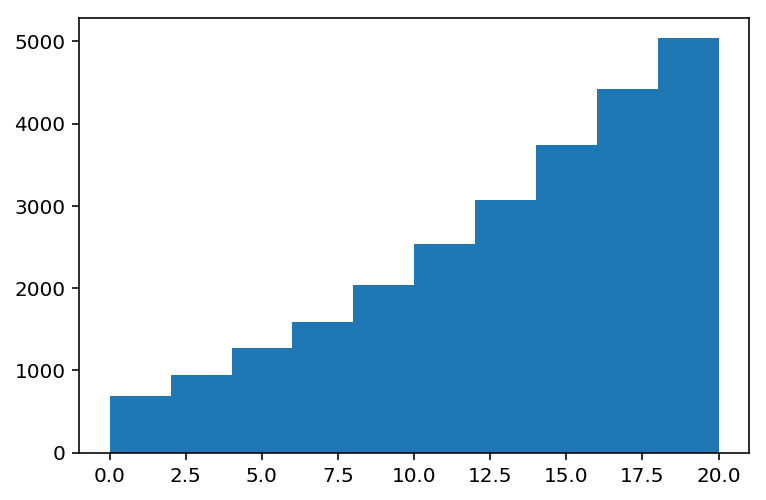

In [12]:
# Histograma 3d
plt.hist(d3d)

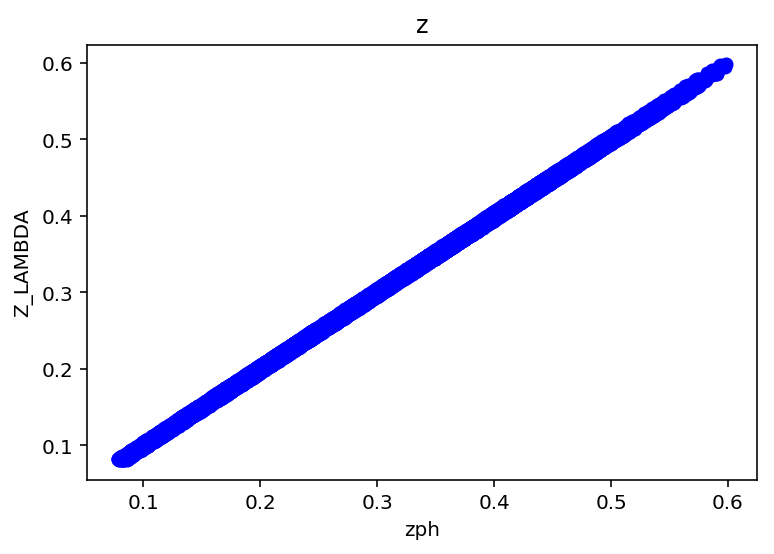

In [13]:
# Plot z vs z
iw = w[idxc_w]
ir = r[idxc_r]
zw = iw['zph']
zr = ir['z_lambda']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zr, 'bo')
plt.xlabel('zph')
plt.ylabel('Z_LAMBDA')
plt.title('z')

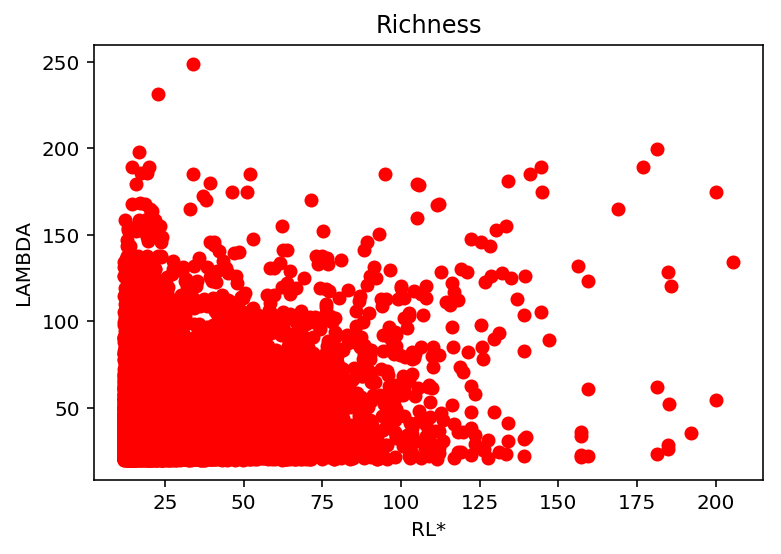

In [14]:
# Plor rich vs rich
rw = iw['RL*']
rr = ir['LAMBDA']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rw,rr, 'ro')
plt.xlabel('RL*')
plt.ylabel('LAMBDA')
plt.title('Richness')

(0, 10)

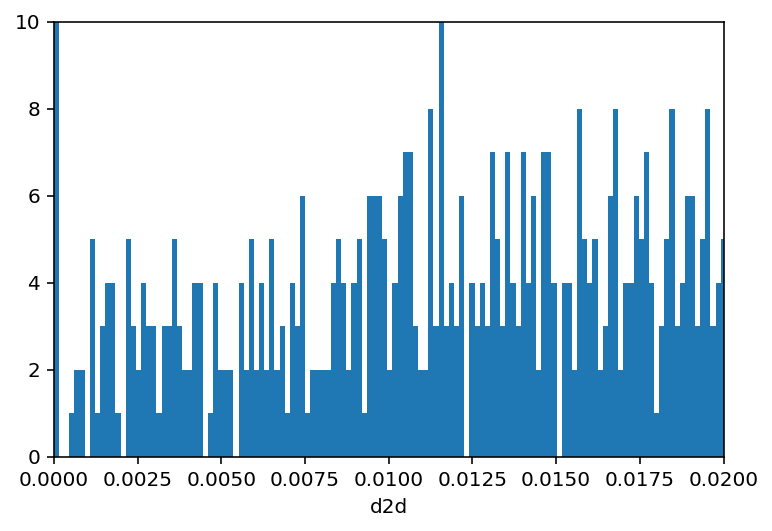

In [15]:
plt.hist(d2d, bins=20000)
plt.xlabel('d2d')
plt.xlim(0,0.02)
plt.ylim(0,10)

In [16]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_r))
print len(idxc_w[d2d<0.0025*u.deg])
print len(idxc_r[d2d<0.0025*u.deg])

obje_wr = idxc_w[d2d<0.0025*u.deg]
obje_rw = idxc_r[d2d<0.0025*u.deg]

o_wr = w[obje_wr]
o_rw = r[obje_rw]

ra_wr = o_wr['RAJ2000']
dec_wr = o_wr['DEJ2000']
z_wr = o_wr['zph']

ra_rw = o_rw['RA']
dec_rw = o_rw['DEC']
z_rw = o_rw['z_lambda']

20876
15294
5186
5186


# Match do Wen com o Koester

In [17]:
print 'match to catalog 3d'
idwk, d2dw, d3d = c_w.match_to_catalog_3d(c_k) 
print 'Match Wen em relacao ao Redmapper =',len(idwk)
print idwk, d2dw, d3d 

print 'match to catalog 3d'
idkw, d2dk, d3d = c_k.match_to_catalog_3d(c_w) 
print 'Match Wen em relacao ao Redmapper =',len(idkw)
print idkw, d2dk, d3d

match to catalog 3d
Match Wen em relacao ao Redmapper = 132684
[7419 6667 7558 ..., 2448 7558 5206] [u'16d07m07.1878s' u'5d30m45.3252s' u'15d08m42.2407s' ..., u'1d51m03.441s'
 u'5d46m29.1791s' u'2d57m08.201s'] [ 148.67041547   90.07930269  968.68411243 ...,  120.69025126  518.87412629
  120.33543007] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 13823
[102825  40716  77649 ...,  29457  47116  73330] [u'2d06m09.0806s' u'0d00m00.1177s' u'0d22m16.9488s' ..., u'0d31m22.3697s'
 u'0d53m30.4223s' u'3d12m13.1059s'] [ 16.18249004   2.99766175   7.58859743 ...,  10.68611578  16.09161372
  31.08858291] Mpc


(0, 6)

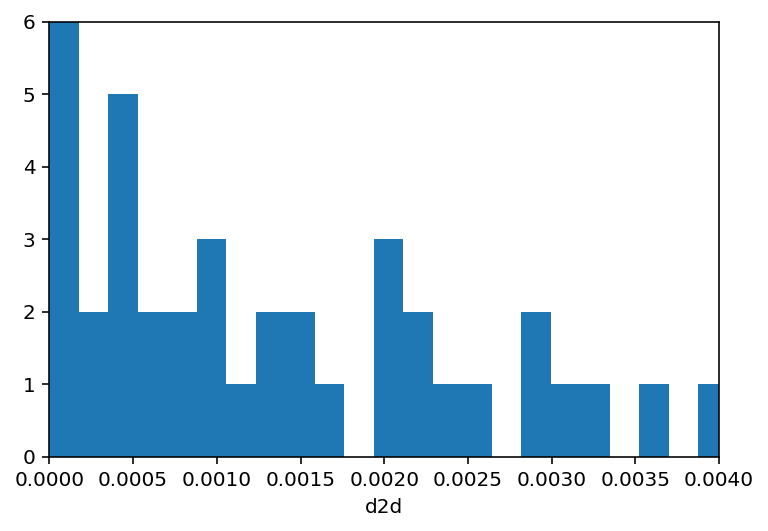

In [18]:
plt.hist(d2dk, bins=30000)
plt.xlabel('d2d')
plt.xlim(0,0.004)
plt.ylim(0,6)

In [19]:
print len(np.unique(idwk))
print len(np.unique(idkw))
print len(idwk[d2dw<0.0020*u.deg])
print len(idkw[d2dk<0.0020*u.deg])

11407
10106
2859
2220


In [20]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_w, idxc_k, d2d, d3d = c_k.search_around_3d(c_w, i*u.kpc)
    lista_i.append(len(idxc_w))
    lista_r.append(i)

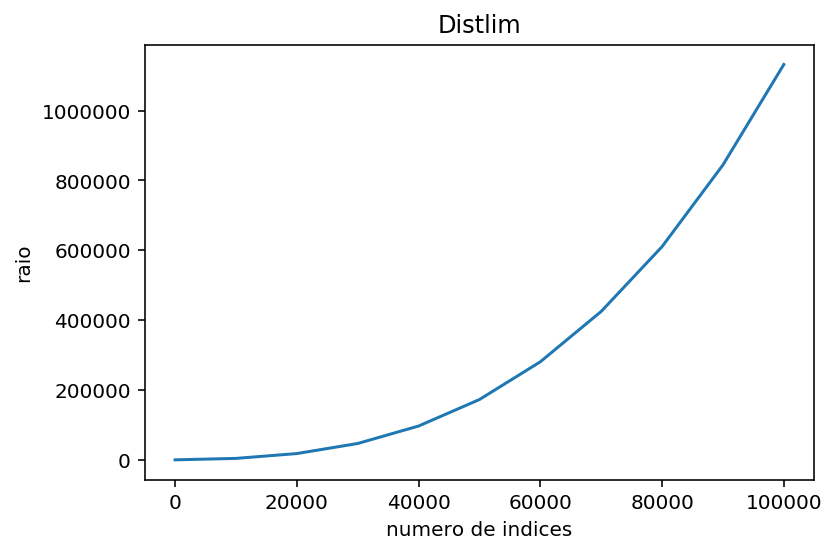

In [21]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.xlabel('numero de indices')
plt.ylabel('raio')
plt.title('Distlim')

In [22]:
print 'Objects around to catalog 3d'
idxc_w, idxc_k, d2d, d3d = c_k.search_around_3d(c_w, 17000*u.kpc)
print 'Números de objetos do wen =',len(idxc_w)
print 'Números de objetos do koester =',len(idxc_k)

Objects around to catalog 3d
Números de objetos do wen = 12512
Números de objetos do koester = 12512


(array([ 3607.,  1978.,  2390.,  2150.,  1174.,   584.,   345.,   175.,
           91.,    18.]),
 array([ 0.        ,  0.21779615,  0.43559229,  0.65338844,  0.87118458,
         1.08898073,  1.30677687,  1.52457302,  1.74236916,  1.96016531,
         2.17796145]),
 <a list of 10 Patch objects>)

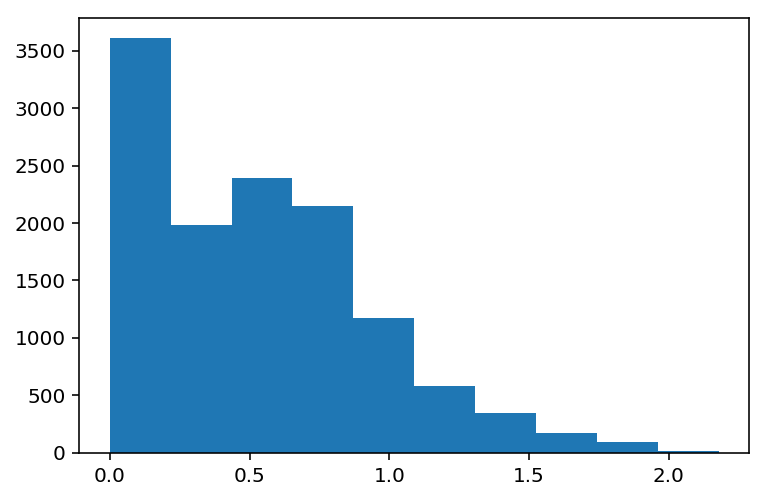

In [23]:
# Histograma de d2d
plt.hist(d2d)

(array([  288.,   398.,   570.,   753.,   996.,  1288.,  1525.,  1903.,
         2215.,  2576.]),
 array([  8.28011210e-06,   1.69991504e+00,   3.39982180e+00,
          5.09972856e+00,   6.79963532e+00,   8.49954208e+00,
          1.01994488e+01,   1.18993556e+01,   1.35992624e+01,
          1.52991691e+01,   1.69990759e+01]),
 <a list of 10 Patch objects>)

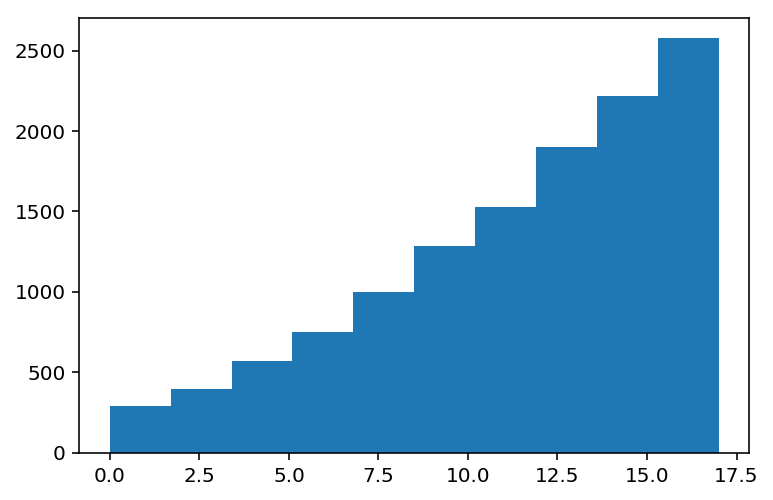

In [24]:
# Histograma de d3d
plt.hist(d3d)

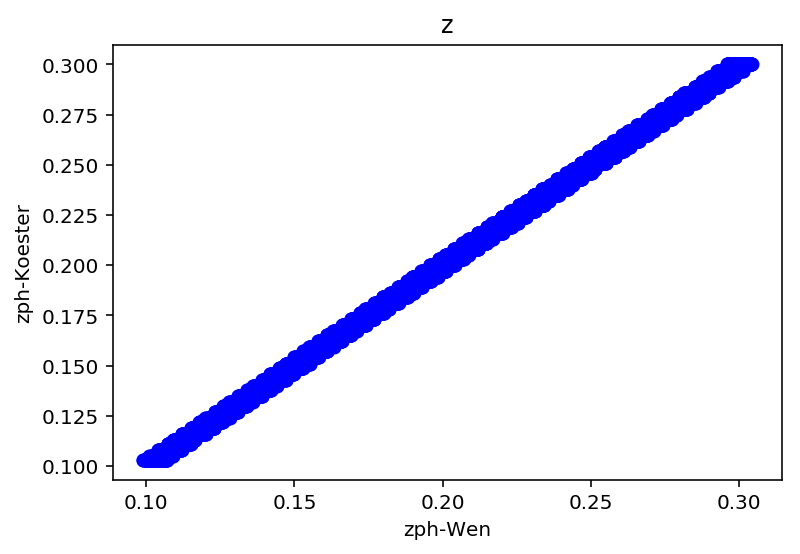

In [25]:
# Plot z vs z
iw = w[idxc_w]
ik = k[idxc_k]
zw = iw['zph']
zk = ik['zph']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zw,zk, 'bo')
plt.xlabel('zph-Wen')
plt.ylabel('zph-Koester')
plt.title('z')

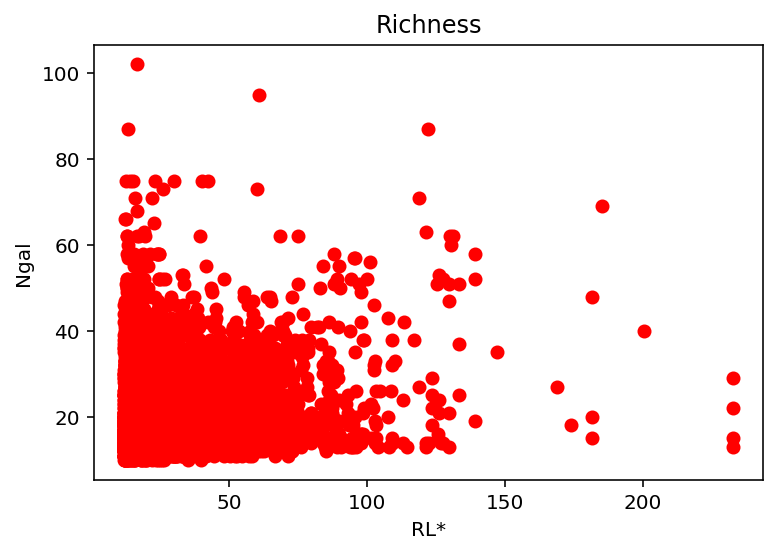

In [26]:
# Plor rich vs rich
rw = iw['RL*']
rk = ik['Ngal']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rw,rk, 'ro')
plt.xlabel('RL*')
plt.ylabel('Ngal')
plt.title('Richness')

(0, 10)

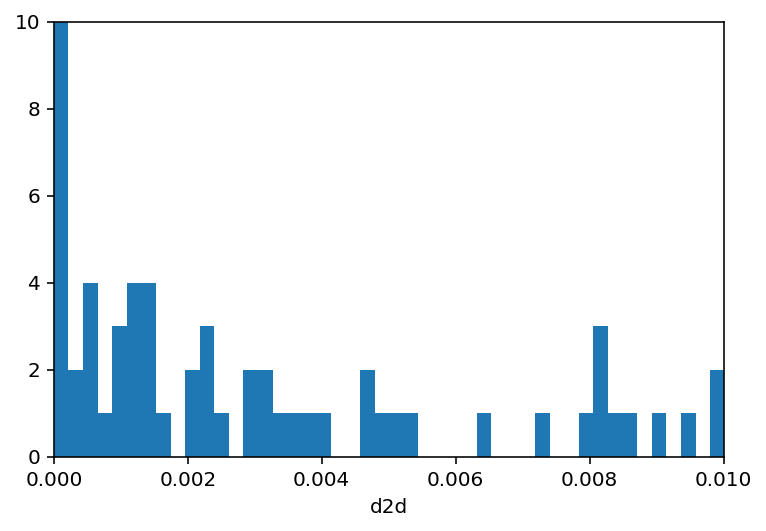

In [27]:
plt.hist(d2d, bins=10000)
plt.xlabel('d2d')
plt.xlim(0,0.01)
plt.ylim(0,10)

In [28]:
print len(np.unique(idxc_w))
print len(np.unique(idxc_k))
print len(idxc_w[d2d<0.002*u.deg])
print len(idxc_r[d2d<0.002*u.deg])

obje_wk = idxc_w[d2d<0.002*u.deg]
obje_kw = idxc_k[d2d<0.002*u.deg]

o_wk = w[obje_wk]
o_kw = k[obje_kw]

ra_wk = o_wk['RAJ2000']
dec_wk = o_wk['DEJ2000']
z_wk = o_wk['zph']

ra_kw = o_kw['RAJ2000']
dec_kw = o_kw['DEJ2000']
z_kw = o_kw['zph']

8838
7783
2135
2135


/home/isabella/Downloads/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 25326 but corresponding boolean dimension is 12512


# Match do Koester com o Rykoff

In [29]:
print 'match to catalog 3d'
idkr, d2dk, d3d = c_k.match_to_catalog_3d(c_r) 
print 'Match Wen em relacao ao Redmapper =',len(idkr)
print idkr, d2dk, d3d 

print 'match to catalog 3d'
idrk, d2dr, d3d = c_r.match_to_catalog_3d(c_k) 
print 'Match Wen em relacao ao Redmapper =',len(idrk)
print idrk, d2dr, d3d 

match to catalog 3d
Match Wen em relacao ao Redmapper = 13823
[    0    18    12 ..., 11039  5641  3351] [u'0d00m00.0433s' u'0d06m05.5363s' u'0d00m00.2362s' ..., u'0d32m53.6089s'
 u'2d11m32.5287s' u'1d16m31.8612s'] [ 33.78239798   8.66886588   8.9358104  ...,  19.30755544  35.44308861
  17.92659839] Mpc
match to catalog 3d
Match Wen em relacao ao Redmapper = 26111
[    0  1209   173 ...,  9357 12208  9369] [u'0d00m00.0433s' u'0d00m00.186s' u'0d43m06.1583s' ..., u'2d36m05.4138s'
 u'2d55m54.3698s' u'0d16m24.9967s'] [  33.78239798    8.64209231   10.96266419 ...,  352.62514555  646.94940014
  662.10417112] Mpc


(0, 10)

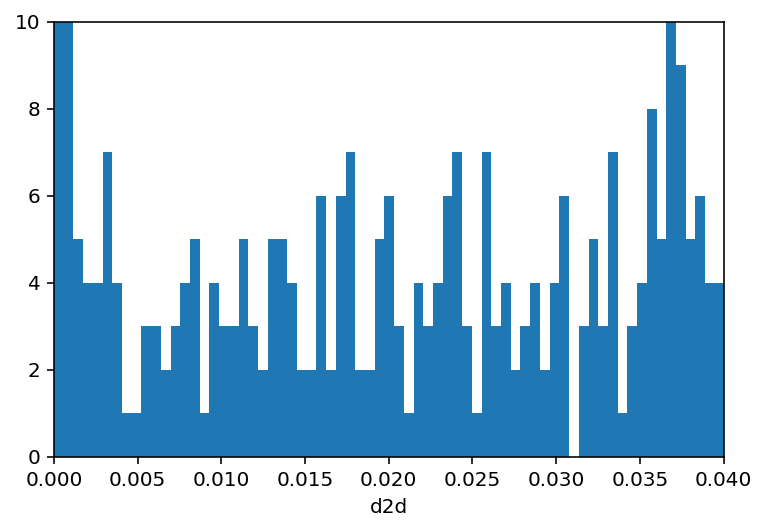

In [30]:
plt.hist(d2dk, bins=30000)
plt.xlabel('d2d')
plt.xlim(0,0.04)
plt.ylim(0,10)

In [31]:
print len(np.unique(idkr))
print len(np.unique(idrk))
print len(idrk[d2dr<0.035*u.deg])
print len(idkr[d2dk<0.035*u.deg])

4810
5031
1670
1927


In [32]:
# Função distlim
lista_i = []
lista_r = []
for i in range(0,101000,10000):
    idxc_r, idxc_k, d2d, d3d = c_k.search_around_3d(c_r, i*u.kpc)
    lista_i.append(len(idxc_r))
    lista_r.append(i)

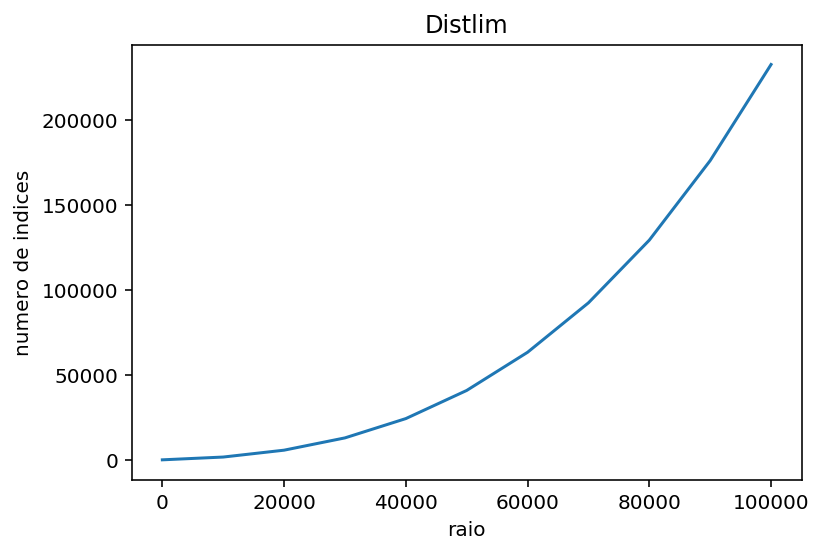

In [33]:
# Plot da função distlim
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(lista_r,lista_i)
plt.ylabel('numero de indices')
plt.xlabel('raio')
plt.title('Distlim')

In [34]:
print 'Objects around to catalog 3d'
idxc_r, idxc_k, d2d, d3d = c_k.search_around_3d(c_r, 30000*u.kpc) 
print 'Números de objetos do rykoff =',len(idxc_r)
print 'Números de objetos do koester =',len(idxc_k)

Objects around to catalog 3d
Números de objetos do rykoff = 12896
Números de objetos do koester = 12896


(array([ 3739.,  2297.,  2482.,  2187.,  1147.,   542.,   250.,   154.,
           77.,    21.]),
 array([  1.97991113e-07,   3.79827294e-01,   7.59654390e-01,
          1.13948149e+00,   1.51930858e+00,   1.89913568e+00,
          2.27896277e+00,   2.65878987e+00,   3.03861697e+00,
          3.41844406e+00,   3.79827116e+00]),
 <a list of 10 Patch objects>)

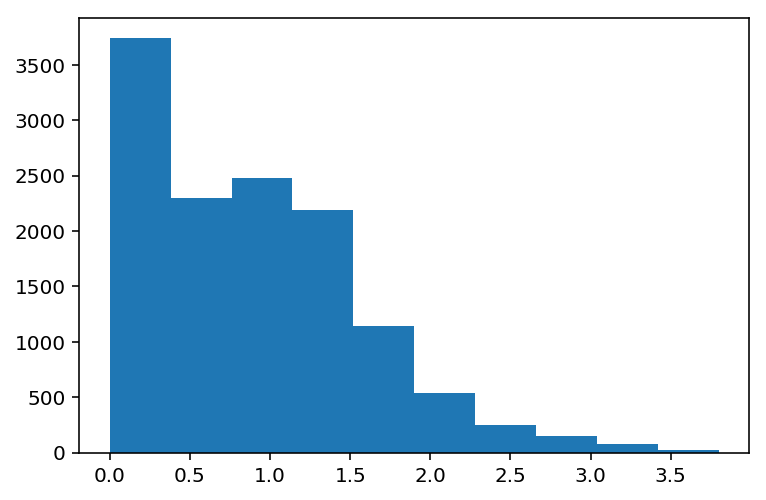

In [35]:
# Histograma de d2d
plt.hist(d2d)

(array([  292.,   419.,   676.,   851.,  1046.,  1342.,  1625.,  1836.,
         2243.,  2566.]),
 array([  0.03972055,   3.03572536,   6.03173017,   9.02773498,
         12.0237398 ,  15.01974461,  18.01574942,  21.01175424,
         24.00775905,  27.00376386,  29.99976867]),
 <a list of 10 Patch objects>)

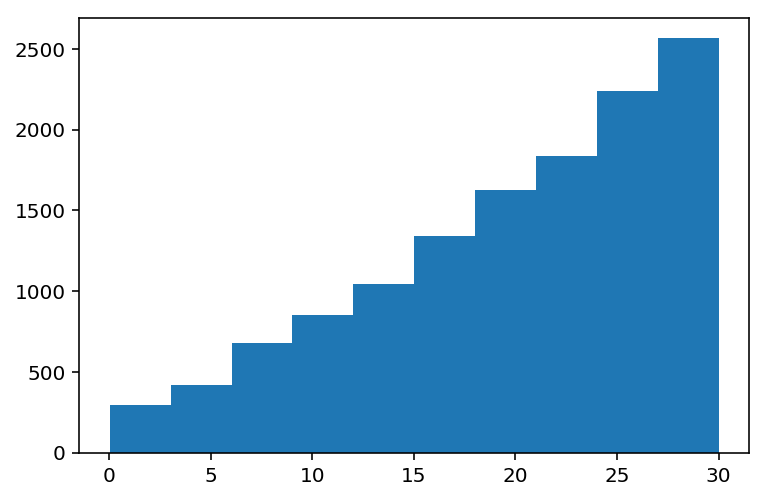

In [36]:
# Histograma de d3d
plt.hist(d3d)

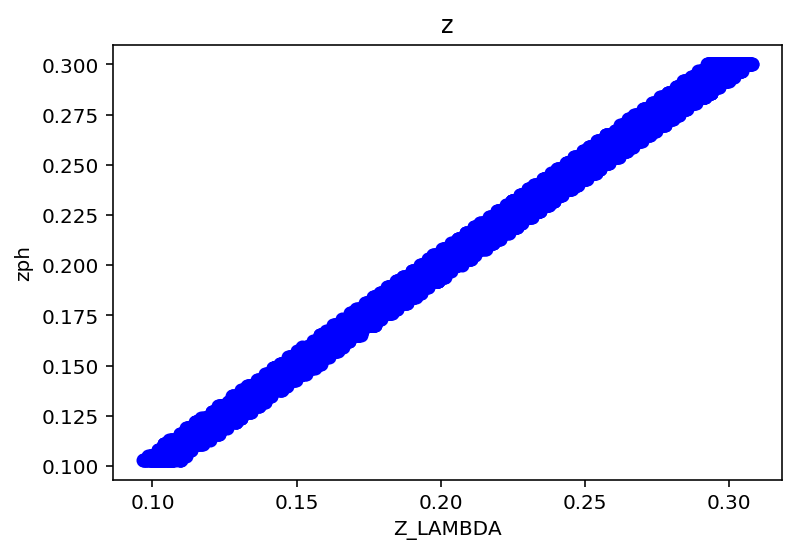

In [37]:
# Plot z vs z
ir = r[idxc_r]
ik = k[idxc_k]
zr = ir['Z_LAMBDA']
zk = ik['zph']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(zr,zk, 'bo')
plt.xlabel('Z_LAMBDA')
plt.ylabel('zph')
plt.title('z')

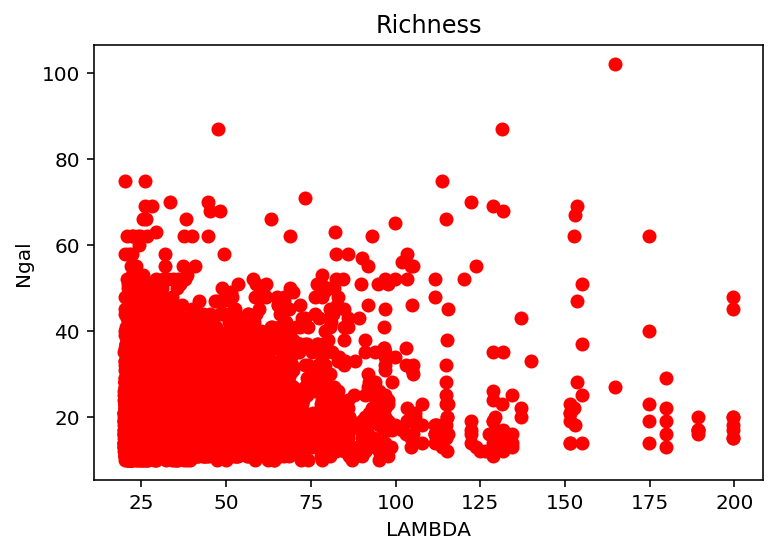

In [38]:
# Plor rich vs rich
rr = ir['LAMBDA']
rk = ik['Ngal']
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt. plot(rr,rk, 'ro')
plt.xlabel('LAMBDA')
plt.ylabel('Ngal')
plt.title('Richness')

(0, 10)

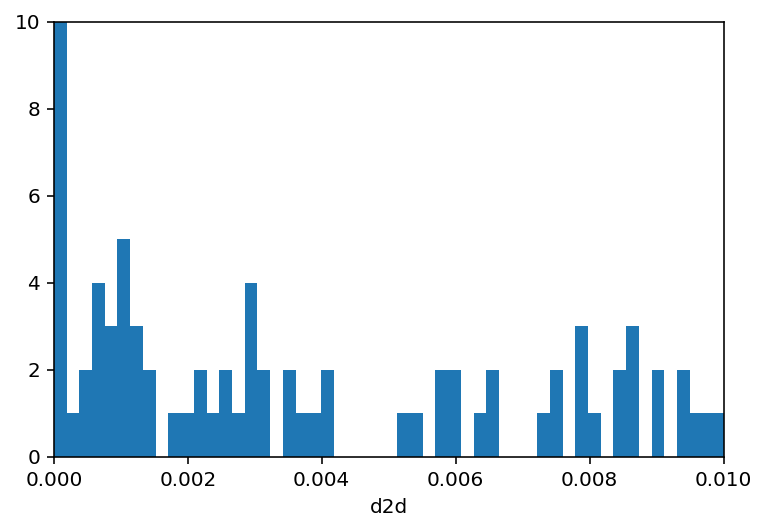

In [39]:
plt.hist(d2d, bins=20000)
plt.xlabel('d2d')
plt.xlim(0,0.01)
plt.ylim(0,10)

In [40]:
print len(np.unique(idxc_k))
print len(np.unique(idxc_r))
print len(idxc_k[d2d<0.002*u.deg])
print len(idxc_r[d2d<0.002*u.deg])

obje_kr = idxc_k[d2d<0.002*u.deg]
obje_rk = idxc_r[d2d<0.002*u.deg]

o_kr = k[obje_kr]
o_rk = r[obje_rk]

ra_kr = o_kr['RAJ2000']
dec_kr = o_kr['DEJ2000']
z_kr = o_kr['zph']

ra_rk = o_rk['RA']
dec_rk = o_rk['DEC']
z_rk = o_rk['z_lambda']

7565
4550
1806
1806


# Diagrama de Venn

In [41]:
# Formatando wr
lista_wr = []
for i in range(0,len(o_wr)):
    lista_wr.append('%.1f_%.1f_%.1f'%(ra_wr[i], dec_wr[i], z_wr[i]))
print len(lista_wr)

5186


In [42]:
# Formatando rw
lista_rw = []
for i in range(0,len(o_rw)):
    lista_rw.append('%.1f_%.1f_%.1f'%(ra_rw[i], dec_rw[i], z_rw[i]))
print len(lista_rw)

5186


In [43]:
# Formatando wk
lista_wk = []
for i in range(0,len(o_wk)):
    lista_wk.append('%.1f_%.1f_%.1f'%(ra_wk[i], dec_wk[i], z_wk[i]))
print len(lista_wk)

2135


In [44]:
# Formatando kw
lista_kw = []
for i in range(0,len(o_kw)):
    lista_kw.append('%.1f_%.1f_%.1f'%(ra_kw[i], dec_kw[i], z_kw[i]))
print len(lista_kw)

2135


In [45]:
# Formatando kr
lista_kr = []
for i in range(0,len(o_kr)):
    lista_kr.append('%.1f_%.1f_%.1f'%(ra_kr[i], dec_kr[i], z_kr[i]))
print len(lista_kr)

1806


In [46]:
# Formatando rk
lista_rk = []
for i in range(0,len(o_rk)):
    lista_rk.append('%.1f_%.1f_%.1f'%(ra_rk[i], dec_rk[i], z_rk[i]))
print len(lista_rk)

1806


In [47]:
# Match de wk e wr
lista_wkr = []
wk = range(0,len(lista_wk))
wr = range(0,len(lista_wr))
for wk in lista_wk: 
    for wr in lista_wr:
        if wk==wr:
            lista_wkr.append(wk)
print len(lista_wkr)

401


In [48]:
# Match de rw e rk
lista_rwk = []
rw = range(0,len(lista_rw))
rk = range(0,len(lista_rk))
for rw in lista_rw: 
    for rk in lista_rk:
        if rw==rk:
            lista_rwk.append(rw)
print len(lista_rwk)

683


In [49]:
# Match de kw e kr
lista_kwr = []
kw = range(0,len(lista_kw))
kr = range(0,len(lista_kr))
for kw in lista_kw: 
    for kr in lista_kr:
        if kw==kr:
            lista_kwr.append(kw)
print len(lista_kwr)

542


In [50]:
# Match de wk e rw
lista_wkrw = []
wk = range(0,len(lista_wk))
rw = range(0,len(lista_rw))
for wk in lista_wk: 
    for rw in lista_rw:
        if wk==rw:
            lista_wkrw.append(wk)
print len(lista_wkrw)

393


In [51]:
# Match de wk e rk
lista_wkrk = []
wk = range(0,len(lista_wk))
rk = range(0,len(lista_rk))
for wk in lista_wk: 
    for rk in lista_rk:
        if wk==rk:
            lista_wkrk.append(wk)
print len(lista_wkrk)

520


In [52]:
# Match de wk e kw
lista_wkkw = []
wk = range(0,len(lista_wk))
kw = range(0,len(lista_kw))
for wk in lista_wk: 
    for kw in lista_kw:
        if wk==kw:
            lista_wkkw.append(wk)
print len(lista_wkkw)

2091


In [53]:
# Match de wk e kr
lista_wkkr = []
wk = range(0,len(lista_wk))
kr = range(0,len(lista_kr))
for wk in lista_wk: 
    for kr in lista_kr:
        if wk==kr:
            lista_wkkr.append(wk)
print len(lista_wkkr)

527


In [54]:
# Match de rw e wr
lista_rwwr = []
rw = range(0,len(lista_rw))
wr = range(0,len(lista_wr))
for rw in lista_rw: 
    for wr in lista_wr:
        if rw==wr:
            lista_rwwr.append(wr)
print len(lista_rwwr)

5041


In [55]:
# Match de rw e kw
lista_rwkw = []
rw = range(0,len(lista_rw))
kw = range(0,len(lista_kw))
for rw in lista_rw: 
    for kw in lista_kw:
        if rw==kw:
            lista_rwkw.append(rw)
print len(lista_rwkw)

391


In [56]:
# Match de rw e kr
lista_rwkr = []
rw = range(0,len(lista_rw))
kr = range(0,len(lista_kr))
for rw in lista_rw: 
    for kr in lista_kr:
        if rw==kr:
            lista_rwkr.append(rw)
print len(lista_rwkr)

663


In [57]:
# Match de wr e rk
lista_wrrk = []
rk = range(0,len(lista_rk))
wr = range(0,len(lista_wr))
for rk in lista_rk: 
    for wr in lista_wr:
        if rk==wr:
            lista_wrrk.append(rk)
print len(lista_wrrk)

663


In [58]:
# Match de wr e kw
lista_wrkw = []
kw = range(0,len(lista_kw))
wr = range(0,len(lista_wr))
for kw in lista_kw: 
    for wr in lista_wr:
        if kw==wr:
            lista_wrkw.append(kw)
print len(lista_wrkw)

393


In [59]:
# Match de wr e kr
lista_wrkr = []
kr = range(0,len(lista_kr))
wr = range(0,len(lista_wr))
for kr in lista_kr: 
    for wr in lista_wr:
        if kr==wr:
            lista_wrkr.append(kr)
print len(lista_wrkr)

649


In [60]:
# Match de rk e kw
lista_rkkw = []
rk = range(0,len(lista_rk))
kw = range(0,len(lista_kw))
for rk in lista_rk: 
    for kw in lista_kw:
        if rk==kr:
            lista_rkkw.append(rk)
print len(lista_rkkw)

2135


In [61]:
# Match de rk e kr
lista_rkkr = []
rk = range(0,len(lista_rk))
kr = range(0,len(lista_kr))
for rk in lista_rk: 
    for kr in lista_kr:
        if rk==kr:
            lista_rkkr.append(kr)
print len(lista_rkkr)

1730


In [72]:
# Match de wr, kr e rk
lista_wrkrrk = []
rkkr = range(0,len(lista_rkkr))
wr = range(0,len(lista_wr))
for rkkr in lista_rkkr: 
    for wr in lista_wr:
        if rkkr==wr:
            lista_wrkrrk.append(wr)
print len(lista_wrkrrk)

646


In [73]:
# Match de wk, kr e rk
lista_wkkrrk = []
rkkr = range(0,len(lista_rkkr))
wk = range(0,len(lista_wk))
for rkkr in lista_rkkr: 
    for wk in lista_wk:
        if rkkr==wk:
            lista_wkkrrk.append(wk)
print len(lista_wkkrrk)

515


In [74]:
# Match de rw, kr e rk
lista_rwkrrk = []
rkkr = range(0,len(lista_rkkr))
rw = range(0,len(lista_rw))
for rkkr in lista_rkkr: 
    for rw in lista_rw:
        if rkkr==rw:
            lista_rwkrrk.append(rw)
print len(lista_rwkrrk)

663


In [75]:
# Match de kw, kr e rk
lista_kwkrrk = []
rkkr = range(0,len(lista_rkkr))
kw = range(0,len(lista_kw))
for rkkr in lista_rkkr: 
    for kw in lista_kw:
        if rkkr==kw:
            lista_kwkrrk.append(kw)
print len(lista_kwkrrk)

525


In [62]:
lista_w = lista_wk + lista_wr

In [63]:
lista_r = lista_rk + lista_rw

In [64]:
lista_k = lista_kw + lista_kr

Diagrama de Venn


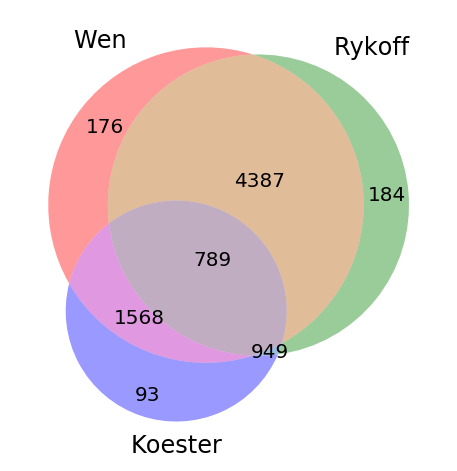

In [65]:
print("\033[43;30mDiagrama de Venn\033[m")
Wen = set(lista_w)
Rykoff = set(lista_r)
Koester = set(lista_k)
venn3([Wen, Rykoff, Koester], ('Wen', 'Rykoff', 'Koester'))
plt.show()

['wr', 'kr', 'rk']
['wk', 'kr', 'rk']
['rw', 'kr', 'rk']
['kw', 'kr', 'rk']


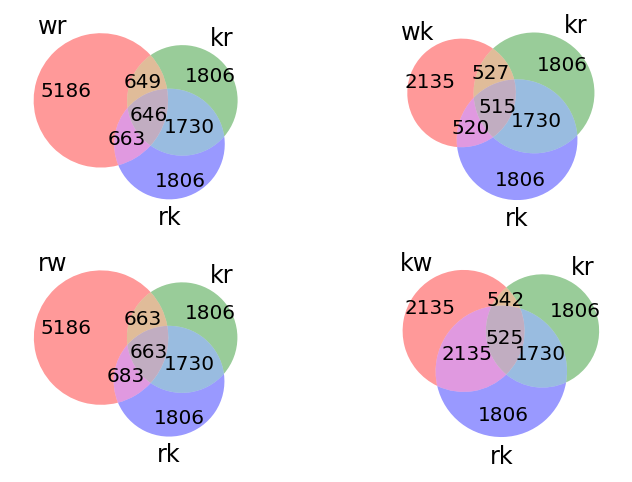

In [81]:
# Diagrama de Venn em função de kr e rk
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Charge données d'apres un fichier 
from test import mock1_13p5 
data = mock1_13p5
# ou bien directement
#data=mock1_14
filename='intersec_jan2015_mock1_MC1e14'+'.png'

from matplotlib_venn import venn3
figure, axes = plt.subplots(2,2)

# enumerate(mock1_13.keys())
authors=['wr', 'wk', 'rw', 'kw']
for (i,auteur) in enumerate(authors):
	auts=data[auteur][1]
	print(auts)
	i_row=i/2
        i_col=np.mod(i,2)
	venn3(subsets=data[auteur][0], set_labels = auts, ax=axes[i_row][i_col])
	# venn3(subsets=set(data[auteur][0]), set_labels = set(auts), ax=axes[0][1])
	# venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'), ax=axes[0[1)
	# venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'), ax=axes[1][0])
	# venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('A', 'B', 'C'), ax=axes[1][1)
# Uncomment to save as pdf 
#pp=PdfPages(filename)

plt.savefig(filename, bbox_inches='tight')
#pp.close()

plt.show(block=False)

Filtrar arquivos dos catálogos por footprint
Labels, explicação
Riqueza vs lambda, explicar a distribuição
Dos múltiplos matches, quem é o mais próximo?
Explicar código do venn no notebook